# Machine Learning: Clasificación co SKLearn
En este notebook estaremos desarrollando varios ejercicios para entender cómo funcionan algunos algoritmos de clasificación.

## Aula 1: Introdicción a la clasificación

In [42]:
# features 1 = si y 0 = no
# tiene pelo largo?
# tiene las uñas afiladas?
# hace miau?

perro1 = [0, 1, 1]
perro2 = [1, 0, 1]
perro3 = [1, 1, 1]

gato1 = [0,1 ,0]
gato2 = [0,1 ,1]
gato3 = [1,1 ,0]

x_train = [perro1, perro2, perro3, gato1, gato2 , gato3]
y_train = [1, 1, 1, 0, 0, 0]

In [43]:
!pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [44]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(x_train, y_train)

/home/celis/.local/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [45]:
animal_misterioso = [1, 1, 1]
model.predict([animal_misterioso])

array([1])

In [46]:
misterio1 = [1, 1, 1]
misterio2 = [1, 1, 0]
misterio3 = [0, 1, 1]

x_test = [misterio1, misterio2, misterio3]
y_test = [0, 1, 1]


In [47]:
previsiones = model.predict(x_test)

In [48]:
correctos = (previsiones == y_test).sum()
total = len(x_test)
tasa_de_acierto = correctos/total
print(f"La tasa de acierto fue de: {round(tasa_de_acierto* 100, 2)}%")

La tasa de acierto fue de: 33.33%


In [49]:
from sklearn.metrics import accuracy_score

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f"La tasa de acierto fue de: {round(tasa_de_acierto* 100, 2)}%")

La tasa de acierto fue de: 33.33%


## Aula 2: Pruebas replicables, estratificación, lectura de datos de internet

In [50]:
import pandas as pd
uri = "https://gist.githubusercontent.com/ahcamachod/38673f75b54ec62ffc290eff8e7c716e/raw/6eaa07e199d9f668bf94a034cb84dac58c82fa4f/tracking.csv"
datos = pd.read_csv(uri)
datos.sample(5)

,home,how_it_works,contact,bought
71,0,0,1,0
74,0,0,1,0
11,1,0,1,1
30,0,1,0,0
13,0,0,1,0


In [51]:
mapa = {
    "home":"principal",
    "how_it_works":"como_funciona",
    "contact":"contacto",
    "bought":"compro"
    }


datos = datos.rename(columns=mapa)
datos.sample(3)

,principal,como_funciona,contacto,compro
18,0,0,1,0
10,1,1,0,1
80,0,0,1,0


In [52]:
x = datos[["principal", "como_funciona","contacto"]]
x.head()

,principal,como_funciona,contacto
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [53]:
y = datos.compro
y.head()

0    0
1    0
2    0
3    0
4    0
Name: compro, dtype: int64

In [54]:
datos.shape

(99, 4)

In [55]:
x_train = x[:75]
y_train = y[:75]
x_test = x[75:]
y_test = y[75:]

In [56]:
y_train.value_counts()

compro
0    48
1    27
Name: count, dtype: int64

In [57]:
27/75

0.36

In [58]:
y_test.value_counts()

compro
0    18
1     6
Name: count, dtype: int64

In [59]:
9/24

0.375

In [60]:
print(f"Entrenamiento con {len(x_train)} elementos y probaremos con {len(x_test)} elementos")

Entrenamiento con 75 elementos y probaremos con 24 elementos


In [61]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

model = LinearSVC()
model.fit(x_train, y_train)
previsiones = model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f"La tasa de acierto fue de: {round(tasa_de_acierto* 100, 2)}%")

La tasa de acierto fue de: 95.83%


/home/celis/.local/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [62]:
from sklearn.model_selection import train_test_split

SEED = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=SEED)

model = LinearSVC()
model.fit(x_train, y_train)
previsiones = model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f"La tasa de acierto fue de: {round(tasa_de_acierto* 100, 2)}%")

La tasa de acierto fue de: 96.0%


/home/celis/.local/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [63]:
y_train.value_counts()

compro
0    50
1    24
Name: count, dtype: int64

In [64]:
24/74

0.32432432432432434

In [65]:
y_test.value_counts()

compro
0    16
1     9
Name: count, dtype: int64

In [66]:
9/25

0.36

## Aula 3: Proyecto de baja dimensionalidad y Baseline

In [67]:
uri = "https://gist.githubusercontent.com/ahcamachod/7c55640f0d65bcbd31bb986bb599180c/raw/1b616e97a8719b3ff245fcdd68eaebdb8da38082/projects.csv"

datos = pd.read_csv(uri)
datos.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [68]:
mapa = {
    "unfinished":"no_finalizado",
    "expected_hours":"horas_esperadas",
    "price":"precio"
    }

datos = datos.rename(columns=mapa)
datos.sample(3)


,no_finalizado,horas_esperadas,precio
1432,0,77,5786
1707,1,33,323
218,1,74,1833


In [69]:
cambio = {1:0,0:1}

datos["finalizado"] = datos.no_finalizado.map(cambio)

In [70]:
datos.sample(5)

,no_finalizado,horas_esperadas,precio,finalizado
287,1,43,426,0
718,1,83,2840,0
1625,0,48,1056,1
1272,0,44,621,1
1850,0,12,291,1


<Axes: xlabel='horas_esperadas', ylabel='precio'>

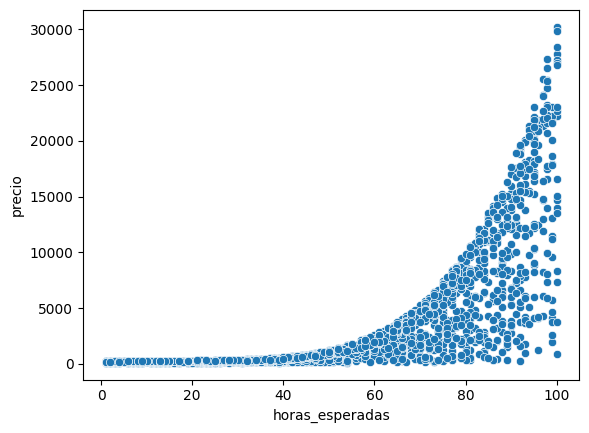

In [71]:
import seaborn as sns

sns.scatterplot(x="horas_esperadas", y="precio", data=datos)

<Axes: xlabel='horas_esperadas', ylabel='precio'>

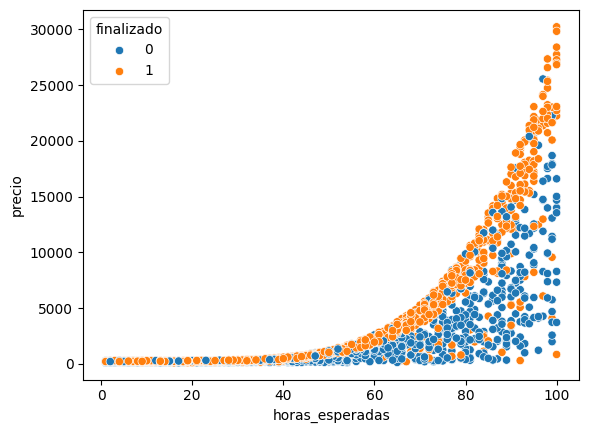

In [72]:
sns.scatterplot(x="horas_esperadas", y="precio", hue = "finalizado", data=datos)

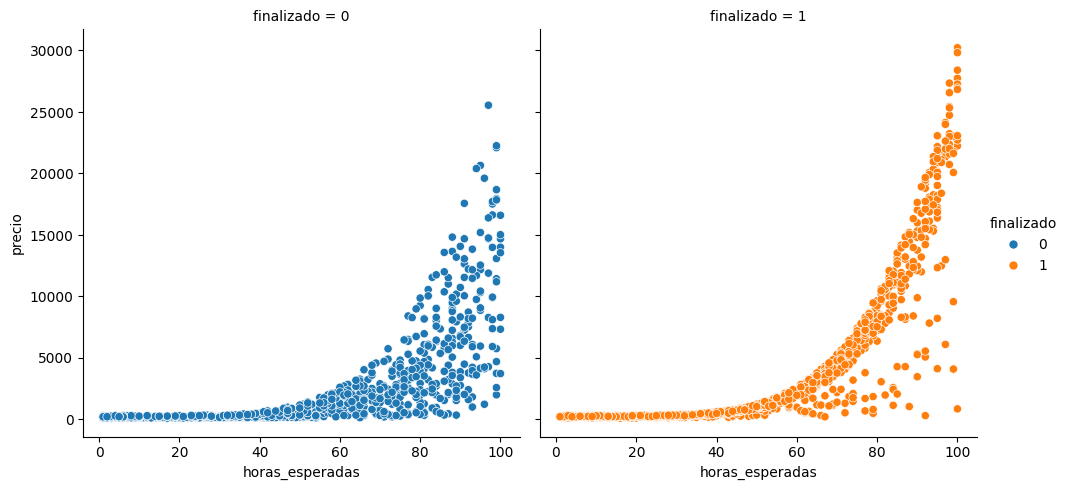

In [73]:
sns.relplot(x="horas_esperadas", y="precio", hue = "finalizado", data=datos, col="finalizado")

In [74]:
import numpy as np

x = datos[["horas_esperadas", "precio"]]
y = datos.finalizado

SEED = 42
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)
print(f"Entrenamiento con {len(x_train)} elementos y probaremos con {len(x_test)} elementos")

model = LinearSVC()
model.fit(x_train, y_train)
previsiones = model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f"La tasa de acierto fue de: {round(tasa_de_acierto* 100, 2)}%")

Entrenamiento con 1617 elementos y probaremos con 540 elementos
La tasa de acierto fue de: 57.59%


/home/celis/.local/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/celis/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [75]:
base_previsiones = np.ones(540)
tasa_de_acierto = accuracy_score(y_test, base_previsiones)
print(f"La tasa de acierto fue de: {round(tasa_de_acierto* 100, 2)}%")

La tasa de acierto fue de: 52.59%


<Axes: xlabel='horas_esperadas', ylabel='precio'>

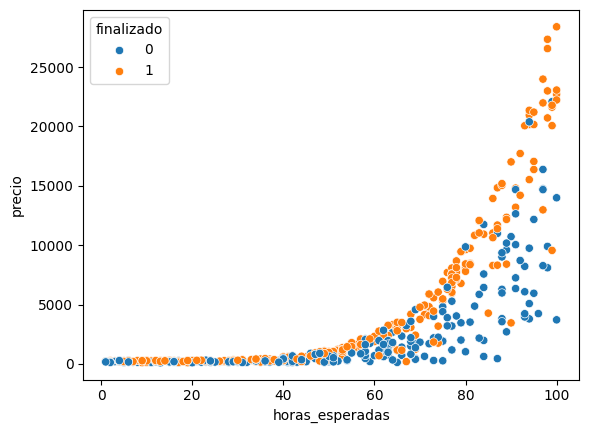

In [76]:
sns.scatterplot(x="horas_esperadas", y="precio", hue=y_test, data=x_test)

In [77]:
x_min = x_test.horas_esperadas.min()
x_max = x_test.horas_esperadas.max()
y_min = x_test.precio.min()
y_max = x_test.precio.max()

In [78]:
pixels = 100
eje_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eje_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

In [79]:
xx, yy = np.meshgrid(eje_x, eje_y)
puntos = np.c_[xx.ravel(), yy.ravel()]
puntos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.811502e+04],
       [9.802000e+01, 2.811502e+04],
       [9.901000e+01, 2.811502e+04]])

In [80]:
Z = model.predict(puntos)

/home/celis/.local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [81]:
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

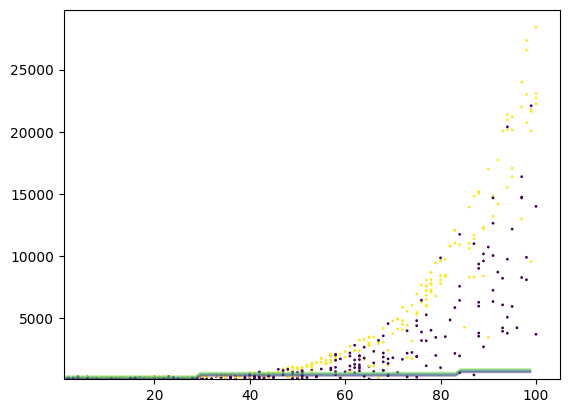

In [82]:
import matplotlib.pyplot as plt

plt.contour(xx, yy, Z, alpha=0.3)
plt.scatter(x_test.horas_esperadas, x_test.precio, c=y_test, s=1)

## Aula 4: Support Vertor Machines y sistemas no lineales.

Entrenamiento con 1617 elementos y probaremos con 540 elementos
La tasa de acierto fue de: 67.78%


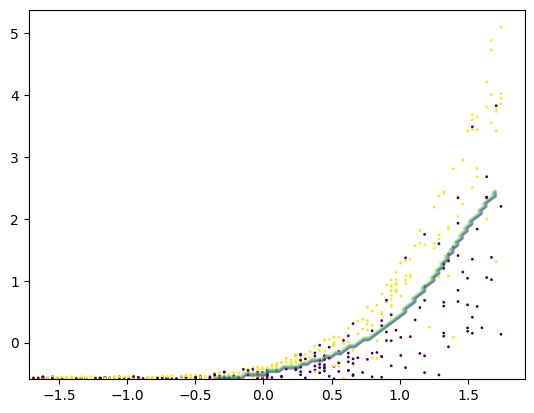

In [88]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

x = datos[["horas_esperadas", "precio"]]
y = datos.finalizado

SEED = 42
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)
print(f"Entrenamiento con {len(x_train)} elementos y probaremos con {len(x_test)} elementos")

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = SVC()
model.fit(x_train, y_train)
previsiones = model.predict(x_test)

data_x = x_test[:,0]
data_y = x_test[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eje_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eje_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

xx, yy = np.meshgrid(eje_x, eje_y)
puntos = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(puntos)
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, alpha=0.3)
plt.scatter(data_x,data_y, c=y_test, s=1)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f"La tasa de acierto fue de: {round(tasa_de_acierto* 100, 2)}%")

## Aula 5: Dummy classifiers y áboles de decisión